<a href="https://colab.research.google.com/github/jackamiegbe/Survival-Analysis/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Survival Analysis – Heart Failure Prediction**

In this project, I performed survival analysis on a heart failure dataset using the Cox Proportional Hazards model. Here’s a breakdown of what I did:
1.	Loaded and Prepared Data:
	•	I worked with a dataset containing features like age, ejection fraction, serum creatinine, and whether a death event occurred.
	•	The time column represented the survival time, and DEATH_EVENT was used to indicate if the patient died.
2.	Trained the Cox Proportional Hazards Model:
	•	I applied the Cox Proportional Hazards model to estimate the impact of each feature on the hazard (or risk of death).
	•	Positive coefficients indicated higher risk, while negative coefficients indicated a lower risk of death.
3.	Analyzed Key Features:
	•	Age and serum creatinine were positively correlated with death, meaning higher values increased the risk.
	•	Ejection fraction had a negative correlation with death, suggesting it was protective and reduced the risk.
4.	Visualized Relationships:
	•	I created a correlation heatmap to visualize the relationships between features and survival outcomes, highlighting which factors played a significant role.

In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=a79c6f0c3095d687549fed1b07a59e59c4b9955668bc25ed42ffce414418b508
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


**Step 1: Load the Dataset**

In [ ]:
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files

uploaded = files.upload()

survival_df = pd.read_csv('5. Survival Analysis - Heart Failure Prediction.csv')

survival_df

Saving 5. Survival Analysis - Heart Failure Prediction.csv to 5. Survival Analysis - Heart Failure Prediction.csv


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**Step 2: Preprocessing the Data**

In [ ]:
survival_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Step 3: Perform Survival Analysis**

<Axes: xlabel='timeline'>

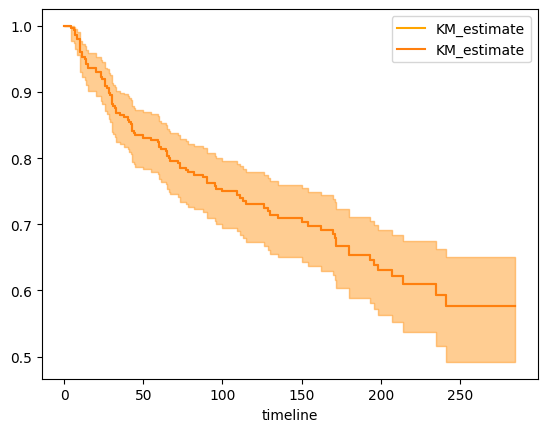

In [ ]:
#Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

#Fit the data into the Kaplan-Meier model
kmf.fit(durations=survival_df['time'], event_observed=survival_df['DEATH_EVENT'])
kmf.plot_survival_function(color='orange')

kmf.plot_survival_function()

**Step 4: Stratify by Groups**

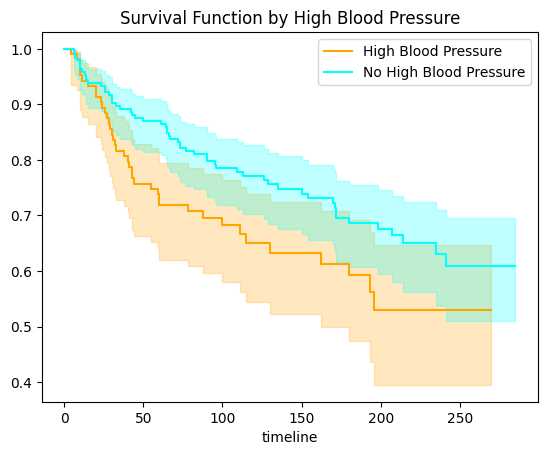

In [ ]:
#Survival analysis based on high blood pressure
kmf_hbp = KaplanMeierFitter()

#Group patients by high blood pressure (1: Yes, 0: No)
hbp_1 = survival_df[survival_df['high_blood_pressure'] == 1]
hbp_0 = survival_df[survival_df['high_blood_pressure'] == 0]

#Fit and plot for high blood pressure group (orange)
kmf_hbp.fit(durations=hbp_1['time'], event_observed=hbp_1['DEATH_EVENT'], label='High Blood Pressure')
ax = kmf_hbp.plot_survival_function(color='orange')

#Fit and plot for no high blood pressure group (blue)
kmf_hbp.fit(durations=hbp_0['time'], event_observed=hbp_0['DEATH_EVENT'], label='No High Blood Pressure')
kmf_hbp.plot_survival_function(ax=ax, color='cyan')

#Set the title for the plot
ax.set_title('Survival Function by High Blood Pressure')

#Show the plot
plt.show()

**Step 5: Cox Proportional Hazards Model**

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -468.23
         time fit was run = 2024-10-23 14:24:58 UTC

---
                          coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                 
age                       0.05      1.05      0.01            0.03            0.06                1.03                1.07
anaemia                   0.46      1.58      0.22            0.04            0.89                1.04                2.42
creatinine_phosphokinase  0.00      1.00      0.00            0.00            0.00                1.00                1.00
diabetes                  0.14      1.15      0.22           -0.30            0.58                0.74                1.78
ejection_fraction        -0.05      0.95      0.01           -0.07           -0.03                0.93                0.97
high_blood_pressure       0.48      1.61      0.22            0.05            0.90                1.05                2.46
platelets                -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
serum_creatinine          0.32      1.38      0.07            0.18            0.46                1.20                1.58
serum_sodium             -0.04      0.96      0.02           -0.09            0.00                0.91                1.00
sex                      -0.24      0.79      0.25           -0.73            0.26                0.48                1.29
smoking                   0.13      1.14      0.25           -0.36            0.62                0.70                1.86

                          cmp to     z      p  -log2(p)
covariate                                              
age                         0.00  4.98 <0.005     20.56
anaemia                     0.00  2.12   0.03      4.89
creatinine_phosphokinase    0.00  2.23   0.03      5.26
diabetes                    0.00  0.63   0.53      0.91
ejection_fraction           0.00 -4.67 <0.005     18.35
high_blood_pressure         0.00  2.20   0.03      5.17
platelets                   0.00 -0.41   0.68      0.56
serum_creatinine            0.00  4.58 <0.005     17.68
serum_sodium                0.00 -1.90   0.06      4.12
sex                         0.00 -0.94   0.35      1.53
smoking                     0.00  0.51   0.61      0.72
---
Concordance = 0.74
Partial AIC = 958.46
log-likelihood ratio test = 81.95 on 11 df
-log2(p) of ll-ratio test = 40.56

<Axes: xlabel='log(HR) (95% CI)'>

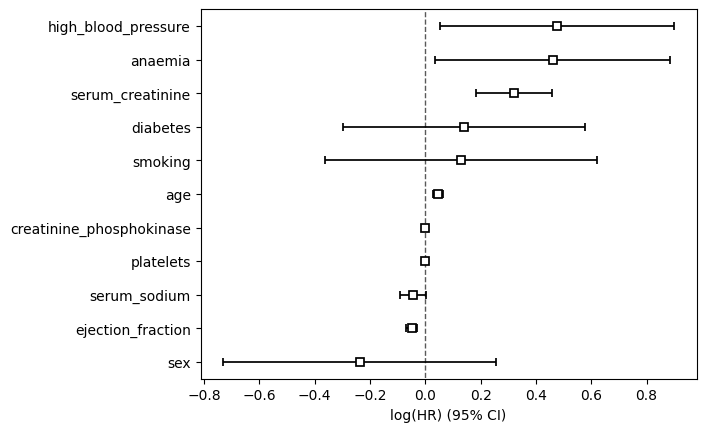

In [ ]:
#Initialize the Cox Proportional Hazards model
cph = CoxPHFitter()

#Fit the Cox model to the dataset
cph.fit(survival_df, duration_col='time', event_col='DEATH_EVENT')

cph.print_summary()

cph.plot()

In [ ]:
#Positive coefficients indicate a higher hazard (higher risk of death),
#while negative coefficients indicate a lower hazard (lower risk).
#A low p-value (<0.05) suggests the feature significantly impacts survival.

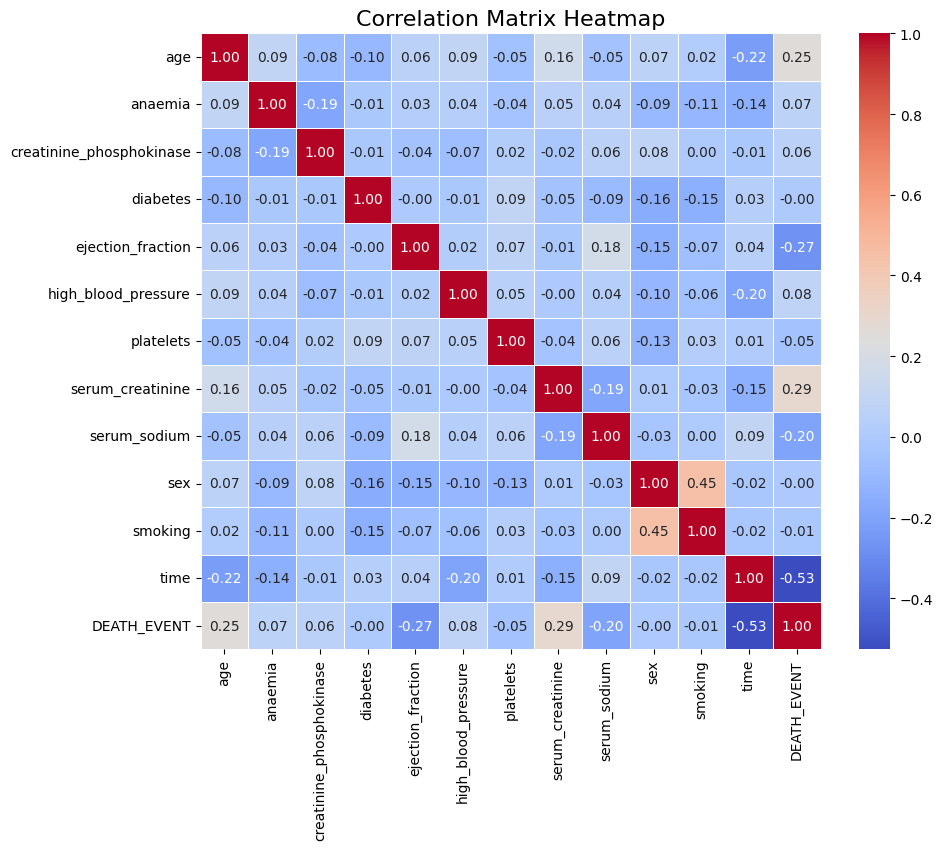

In [ ]:
correlation_matrix = survival_df.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size if necessary
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap', size=16)

plt.show()

In [ ]:
# Heatmap Insights:
# - Age and DEATH_EVENT have a positive correlation (0.25), meaning older age increases the risk of death.
# - Ejection Fraction and DEATH_EVENT are negatively correlated (-0.27), indicating higher ejection fraction reduces death risk.
# - Serum Creatinine has a positive correlation with DEATH_EVENT (0.29), meaning higher levels increase death risk.
# - Time and DEATH_EVENT show a strong negative correlation (-0.53), indicating longer survival reduces the likelihood of death.
# - Serum Sodium has a slight negative correlation with DEATH_EVENT (-0.20), lower levels suggest higher risk of death.